# A Study of Student Performance in Exams
A dataset entitled [Student's Performance in Exams]('https://www.kaggle.com/spscientist/students-performance-in-exams') observed the test scores in the subjects of math, reading, and writing while observing secondary variables such as gender, race/ethnicity, parental education, lunch cost, and test preparation completion.

This notebook begins with an introductory analysis of the data then continues into a three-step research proposal in which:
1. The **experimental hypothesis** is introduced
2. A **rollout plan** describing the method of implementation is discussed
3. An **evaluation plan** where the measurements of what constitutes as a successful experiment are presented

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [174]:
df = pd.read_csv('C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Exercises\\Curriculum\\1.5.1 Drill\\StudentsPerformance.csv')
df.columns = ['gender', 'race', 'parent_education', 'lunch','test_prep', 'math_score', 'reading_score', 'writing_score']
df['average'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

### Introductory Analysis

In [175]:
df.head()

,gender,race,parent_education,lunch,test_prep,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [176]:
#Locating all variables in df
print(df.gender.unique())
print(df.race.unique())
print(df.parent_education.unique())
print(df.lunch.unique())
print(df.test_prep.unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [272]:
df.describe()

,math_score,reading_score,writing_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [274]:
df.isnull().sum()

gender              0
race                0
parent_education    0
lunch               0
test_prep           0
math_score          0
reading_score       0
writing_score       0
average             0
dtype: int64

In [177]:
#Observing scores across race groups
race = df.groupby('race').agg('mean')
race

,math_score,reading_score,writing_score,average
race,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


In [179]:
#Observing scores across parent education
df.groupby('parent_education').mean()

,math_score,reading_score,writing_score,average
parent_education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


With the exception of 'high school' and 'some high school', the trends perfectly follow the expected pattern of greater parental education positively affecting their children's education.

In [178]:
df.groupby('lunch').mean()

,math_score,reading_score,writing_score,average
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


In the above cell, we see a potential correlation between lunch type and average score. However, it would be unreasonable to assume raising the cost of lunch would improve scores. Working under the assumption that schools that offer standard lunch are in wealthier, more economically developed geographic locations, the issue is not changing food accessibility but increasing economic/educational development.

In [263]:
lunch_groups = df.groupby(['lunch', 'parent_education'])['average'].agg(['mean','count'])
lunch_groups['perc_count'] = lunch_groups['count']/lunch_groups['count'].sum()
lunch_groups

mean  count  perc_count
lunch        parent_education                                
free/reduced associate's degree  65.428571     77       0.077
             bachelor's degree   67.053030     44       0.044
             high school         57.376190     70       0.070
             master's degree     67.111111     24       0.024
             some college        62.970464     79       0.079
             some high school    57.224044     61       0.061
standard     associate's degree  71.767816    145       0.145
             bachelor's degree   74.819820     74       0.074
             high school         66.275132    126       0.126
             master's degree     78.047619     35       0.035
             some college        71.435374    147       0.147
             some high school    69.183616    118       0.118

The additional *perc_count* column illustrates the heavier density of the population in the "standard" lunch group. While the dataset does not provide more economic data on where the "free/reduced" lunch groups are located, it is most likely government-funded programs in lower economic areas. It would be interesting to observe how similar economic areas differ in scores when comparing the lunch cost.

### Step 1. Experimental Hypothesis

While there are a variety of approaches one could take, the most beneficial variable that positively affects the average is whether or not the student completed the test preparation. For a high-level visualization supporting this claim, see the histogram below: 

In [211]:
complete_test_prep = df[df['test_prep'] == 'completed']
incomplete_test_prep = df[df['test_prep'] == 'none']

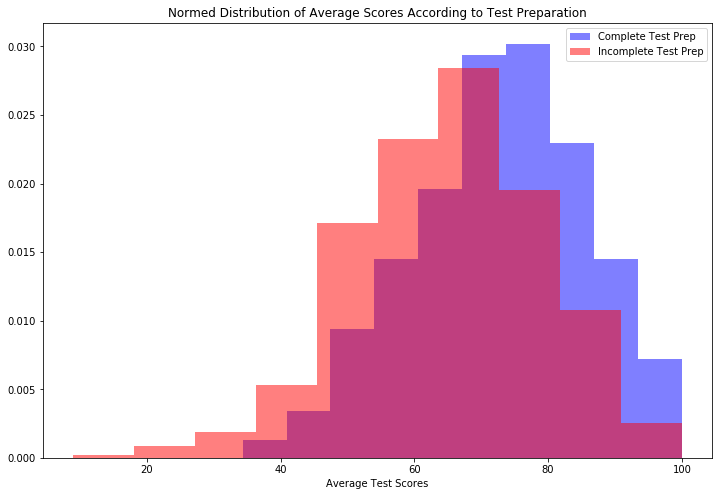

In [222]:
plt.figure(figsize=[12,8])
plt.hist(complete_test_prep['average'], normed=True, color='blue', alpha=.5) 
plt.hist(incomplete_test_prep['average'], normed=True, color='red', alpha=.5)
plt.title('Normed Distribution of Average Scores According to Test Preparation')
plt.legend(['Complete Test Prep','Incomplete Test Prep'])
plt.xlabel('Average Test Scores')
plt.show()

As you can see in the graph below, the test preparation has a positive affect across all subjects.

In [342]:
print(df[df.test_prep == 'completed'].agg({'math_score':['mean','median','std'],
                                           'reading_score':['mean','median','std'],
                                           'writing_score':['mean','median','std'],
                                           'average':['mean', 'median','std']}))
print(df[df.test_prep == 'none'].agg({'math_score':['mean','median','std'],
                                           'reading_score':['mean','median','std'],
                                           'writing_score':['mean','median','std'],
                                             'average':['mean', 'median','std']}))

        math_score  reading_score  writing_score   average
mean     69.695531      73.893855      74.418994  72.66946
median   69.000000      75.000000      76.000000  73.50000
std      14.444699      13.638384      13.375335  13.03696
        math_score  reading_score  writing_score    average
mean     64.077882      66.534268      64.504673  65.038941
median   64.000000      67.000000      65.000000  65.333333
std      15.192376      14.463885      14.999661  14.186707


In [315]:
df.groupby(['test_prep', 'race'])['math_score','reading_score','writing_score'].agg(['mean','median','std','count'])

math_score                         reading_score         \
                        mean median        std count          mean median   
test_prep race                                                              
completed group A  68.258065   72.0  16.453911    31     71.032258   72.0   
          group B  67.191176   65.5  14.339443    68     72.852941   74.5   
          group C  67.495726   67.0  14.282026   117     73.658120   75.0   
          group D  69.792683   69.5  12.804067    82     74.146341   75.0   
          group E  77.433333   79.0  13.653542    60     76.666667   75.0   
none      group A  58.086207   58.0  12.102319    58     61.275862   60.5   
          group B  61.368852   62.0  15.736572   122     64.286885   64.0   
          group C  62.707921   63.0  14.927981   202     66.465347   67.0   
          group D  66.255556   67.5  14.082805   180     68.155556   68.5   
          group E  71.112500   72.0  16.371474    80     70.300000   72.5   

                                   writing_score                          
                         std count          mean median        std count  
test_prep race                                                            
completed group A  16.073755    31     70.903226   74.0  15.038517    31  
          group B  13.109487    68     71.882353   73.5  13.468071    68  
          group C  13.996405   117     74.452991   77.0  13.556075   117  
          group D  12.707655    82     76.658537   77.5  12.318028    82  
          group E  13.361552    60     75.983333   76.0  12.981723    60  
none      group A  14.258015    58     58.275862   58.0  13.923088    58  
          group B  15.432862   122     62.098361   63.0  15.696191   122  
          group C  13.335371   202     63.990099   65.0  14.449084   202  
          group D  14.041368   180     67.177778   69.0  14.284482   180  
          group E  15.438240    80     67.975000   69.0  15.755228    80

For the most concise visualization of the positive effects across the variety of racial groups, observe the violin plot below. For a breakdown of the actual figures, see the graph two cells below where the increase can be quantified across groups - for a total percentage increase of 9.9% across all groups.

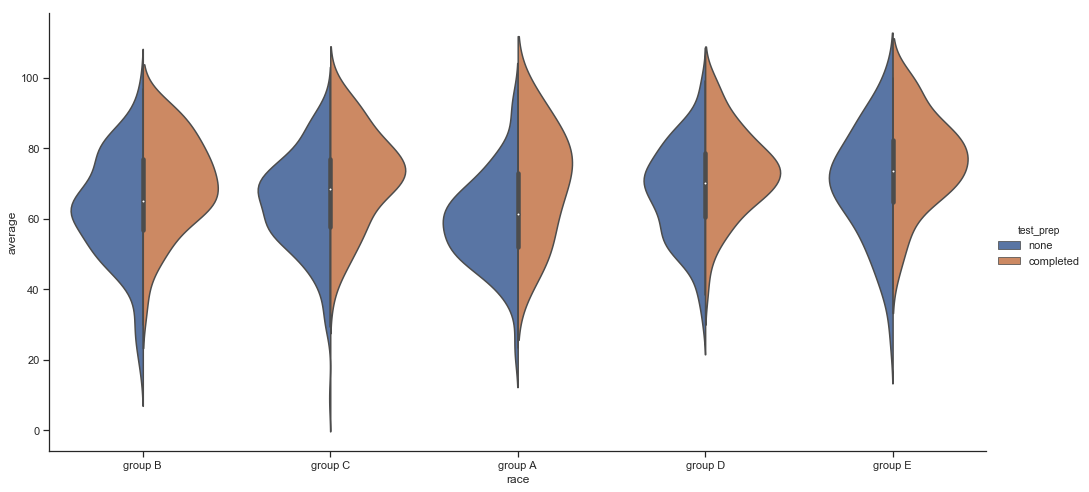

In [336]:
sns.catplot(x="race", y="average", hue="test_prep",
            kind="violin", split=True, data=df, height=7, aspect=2)

In [337]:
df.groupby(['race','test_prep'])['average'].mean()

race     test_prep
group A  completed    70.064516
         none         59.212644
group B  completed    70.642157
         none         62.584699
group C  completed    71.868946
         none         64.387789
group D  completed    73.532520
         none         67.196296
group E  completed    76.694444
         none         69.795833
Name: average, dtype: float64

In [339]:
mean_comp = (averages[0]+averages[2]+averages[4]+averages[6]+averages[8])/4
mean_incomp = (averages[1]+averages[3]+averages[5]+averages[7]+averages[9])/4
print(mean_comp)
print(mean_incomp)
print(mean_comp-mean_incomp)

90.70064590759273
80.79431538505509
9.906330522537644


In [276]:
print(df.groupby('test_prep').count().drop(['math_score', 'reading_score', 'writing_score'], axis=1))

           gender  race  parent_education  lunch  average
test_prep                                                
completed     358   358               358    358      358
none          642   642               642    642      642


As consistently effective as the test preparation is, only 35.8% of students are actually completing the specified preparation course - leaving the 64.2% majority with no completion of preparation. Considering that this is a easy variable of change (as opposed to something like the race/ethnic group), this will be the primary variable of focus in the attempt to improve student scores in all subjects.

Therefore, the hypothesis of this proposal is that **increasing student involvement in the test preparation course will increase the overall student grade.**

### Step 2. Rollout Plan

Since the two test-participation groups are currently split at appriximately 1/3 (for students who completed the course) and 2/3 (students who did not complete the course), the rollout plan is to effectively flip those fractions so that the control group of students who did not complete the course becomes 33% and those who complete the course are at 66%. Doing this will allow the control group of those who will not complete the course (33%) to be compared against the larger 66% of students who will be participating.

The selection of the new 33% of participants will be at random since all groups see a the same relative percentage increase through participation in the test prep course. Therefore, the final comparison will be a type of A/B comparison.

The timeline of this experiment will be over the course of a school term in order to replicate the same study and measure the expected progress against the former term.

### Step 3. Evaluation Plan

As mentioned above, the primary variable of focus will be the student's participation in the test preparation course. As a result of focusing on this, the positive benefit should scale to improve the average population score.

For example, in the current study, 35.8% of students participated in the test preparation course and received an average score across subjects of 72.66946%. The other 64.2% of students who did not participate, on the other hand, received an average of 65.038941%. As a result, the average of the entire population was 67.770667%. If this proposed experiment scales like the previous experiment, the entire population should see an increase from 67.770667% to 69.425%.

In conclusion, **by increasing student participation to 66% in the test preparation course, the entire population will see the overall grade increase by 1.6% - from the current 67.770667% to the expected 69.425%.**